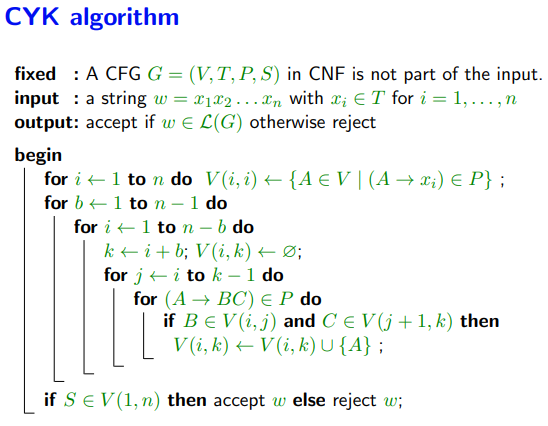

In [29]:
from copy import deepcopy

CFG = {"V":["S","A","B","C"], "T":["a","b"], "P":[("S", "A B"), ("S", "B C"), ("A", "B A"), ("A", "a"), ("B", "C C"), ("B", "b"), ("C", "A B"), ("C", "a")] , "S":"S"}

def toodee_print(matrix):
    g = deepcopy(matrix)
    g.remove(g[0])
    for row in g:
        row.remove(row[0])
        print(row)

def cyk(w):
    n = len(w) + 1
    matrix = [[[] for _ in range(n)] for _ in range(n)]

    for i in range(1, n):
        for rule in CFG.get("P"):
            if len(rule[1]) == 1 and rule[1] == w[i-1]:
                #print(rule[0])
                matrix[i][i].append(rule[0])
    # toodee_print(matrix)
    # print()

    for b in range(1, n):
        for i in range(1, n-b):
            k = i+b
            #print(i,k)
            matrix[i][k] = []

            for j in range(i, k):
                for rule in CFG.get("P"):
                    yields = rule[1].split()

                    if yields[0] in matrix[i][j] and yields[1] in matrix[j+1][k]:
                        if rule[0] not in matrix[i][k]:
                            matrix[i][k].append(rule[0])
    
    toodee_print(matrix)
    if CFG.get("S") in matrix[1][n-1]:
        return True
    else:
        return False

In [30]:
result = cyk("baaba")
print(result)

[['B'], ['S', 'A'], [], [], ['S', 'A', 'C']]
[[], ['A', 'C'], ['B'], ['B'], ['S', 'C', 'A']]
[[], [], ['A', 'C'], ['S', 'C'], ['B']]
[[], [], [], ['B'], ['S', 'A']]
[[], [], [], [], ['A', 'C']]
True
